Muhammed Hüseyin Beyribey - 22102570 - IE 423 - TASK 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load The Data

In [ ]:
dfFootball = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final_data.csv')
dfFootball.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
dfFootball.columns.tolist()

['player',
 'team',
 'name',
 'position',
 'height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

# Select Data

In [ ]:
y = dfFootball['current_value']

In [ ]:
features_without_currentvalue = ['player',
 'team',
 'name',
 'position',
 'height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'highest_value',
 'position_encoded',
 'winger']
X = dfFootball.loc[:,features_without_currentvalue]
X.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,4.000000,1.000000


# Build Model

we want to predict the `current_value` of the players based on their other attributes. I will use the `DecisionTreeRegressor` from the scikit-learn library.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

string_columns = dfFootball[features_without_currentvalue].select_dtypes(include='object').columns

string_columns

Index(['player', 'team', 'name', 'position'], dtype='object')

There are string values in columns "player", "team", "name", and "position". I think column position can be labeled easy because there are limited positions such as Goalkeeper, Defender Centre-Back, I will drop the remaining columns team and name I don't think information in these columns is important.

In [ ]:
from sklearn.preprocessing import LabelEncoder
dfFootball = dfFootball.drop(columns=['team', 'name', 'player'])

# Encode the 'position' column
label_encoder = LabelEncoder()
dfFootball['position'] = label_encoder.fit_transform(dfFootball['position'])

Labeling works!

Now I will check whether there is any NaN value.

In [ ]:
dfFootball.isna().sum()

position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

Luckily, there are no missing value. Therefore, I do not need to bother with missing data. I will continue with Decision Tree Regression.

Firstly, I have changed my data frame, I need to redefine my X.

In [ ]:
dfFootball.columns.tolist()

['position',
 'height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

In [ ]:
X = dfFootball.drop(columns=['current_value'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

After rearranging Dataframe decision tree regression works fine.

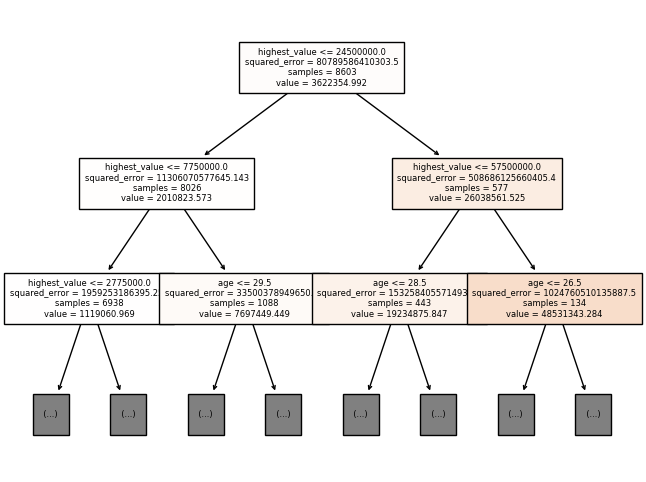

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(tree_model, max_depth=2, feature_names=X.columns, fontsize=6, filled=True)
plt.show()

### Predict!

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

mae_in = mean_absolute_error(y_train, tree_model.predict(X_train))
print("MAE(in-sample score): {mae_in}".format(mae_in=mae_in))
print("MAE(test-trains split): {mae}".format(mae=mae))

MAE(in-sample score): 2.90596303615018
MAE(test-trains split): 1298500.6973500696


**Some other statistical values**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"Mean absolute error: {mae:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean absolute error: 1298500.70
Root mean squared error: 3997722.10
R-squared: 0.82


# Ensemble Random Forest Model

First Improvement.

In [ ]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)
  # Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 100, 200, 300, 400, 500, 600, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2231256.935260474
Max leaf nodes:  50 	 Mean Absolute Error:  1268630.2923173022
Max leaf nodes:  100 	 Mean Absolute Error:  1291768.2790931002
Max leaf nodes:  200 	 Mean Absolute Error:  1232148.1071280674
Max leaf nodes:  300 	 Mean Absolute Error:  1256259.1699139876
Max leaf nodes:  400 	 Mean Absolute Error:  1235010.6399932073
Max leaf nodes:  500 	 Mean Absolute Error:  1241144.8300850955
Max leaf nodes:  600 	 Mean Absolute Error:  1245597.0136536881
Max leaf nodes:  50000 	 Mean Absolute Error:  1292298.930729893


The best depth of the tree is at 200 max leaf nodes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
forest_model = RandomForestRegressor(random_state=1, n_estimators=200)

# Fit model
forest_model.fit(X_train, y_train)

# Predict
y_pred_rf = forest_model.predict(X_test)

print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_pred_rf))

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Mean absolute error: {mae_rf:.2f}")
print(f"Root mean squared error: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

MAE (Random Forest):
1001498.8241902991
Mean absolute error: 1001498.82
Root mean squared error: 2920926.33
R-squared: 0.91


The Random Forest model has shown a significant improvement in terms of MAE, RMSE, and R-squared compared to the Decision Tree model. The high R-squared value indicates a better fit of the Random Forest model to the data. Thus, it calculates the current value of the football player better.

  Additionally, I want to show more clearly Random Forest is better.

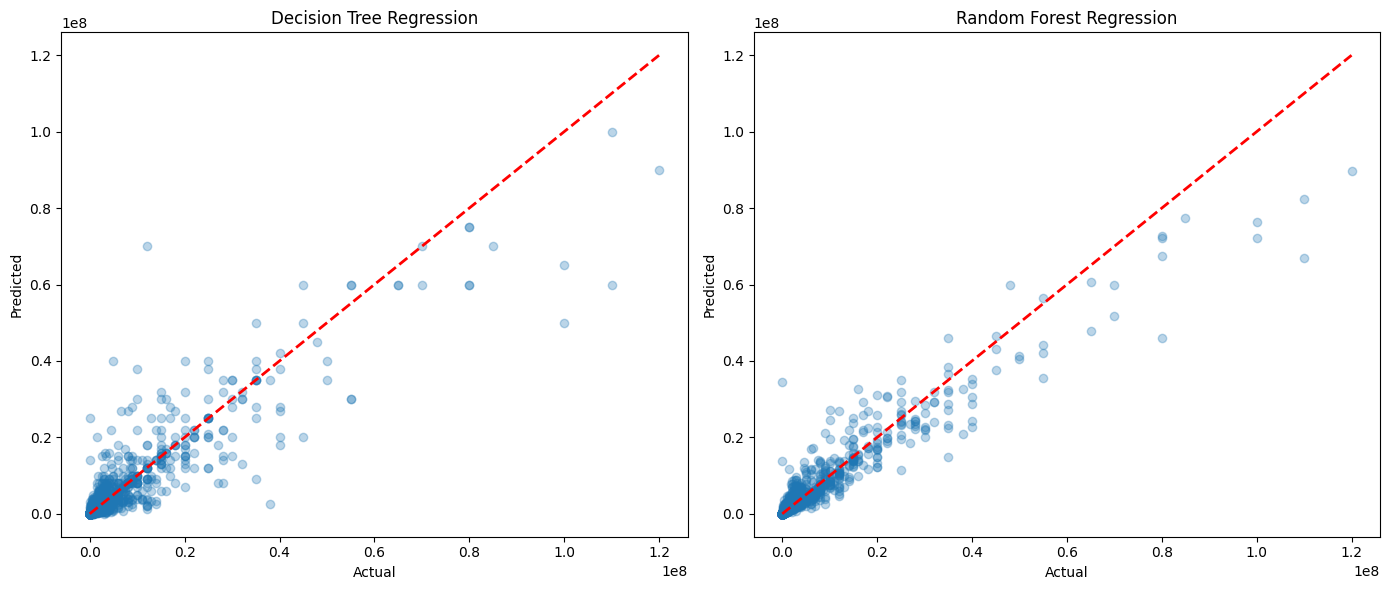

({'MAE': 1298500.6973500696,
  'RMSE': 3997722.103897506,
  'R2': 0.8232781928581667},
 {'MAE': 1001498.8241902991,
  'RMSE': 2920926.3340752083,
  'R2': 0.9056577674370814})

In [ ]:
import matplotlib.pyplot as plt

y_pred_dt = tree_model.predict(X_test)
y_pred_rf = forest_model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()

dt_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': mean_squared_error(y_test, y_pred_dt) ** 0.5,
    'R2': r2_score(y_test, y_pred_dt)
}

rf_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': mean_squared_error(y_test, y_pred_rf) ** 0.5,
    'R2': r2_score(y_test, y_pred_rf)
}

dt_metrics, rf_metrics


In [ ]:
test_subset = X_test.sample(n=10, random_state=42)

y_pred_dt_subset = tree_model.predict(test_subset)
y_pred_rf_subset = forest_model.predict(test_subset)

comparison_df = pd.DataFrame({
    'Actual': y_test.loc[test_subset.index],
    'Predicted_DT': y_pred_dt_subset,
    'Predicted_RF': y_pred_rf_subset
})

print(comparison_df)


         Actual  Predicted_DT  Predicted_RF
7918      10000       10000.0        3200.0
274    35000000    35000000.0    32455000.0
10704    200000      200000.0      190875.0
8444          0           0.0           0.0
10142    900000      600000.0      820250.0
3721    8000000    15000000.0    13692750.0
6384    3500000     1200000.0     3254500.0
6686     200000      300000.0      293125.0
9745     250000      300000.0      218875.0
8843     450000      450000.0      405375.0


Why is Random Forst better ? Because Random Forest is an ensemble learning method that combines multiple decision trees. Each tree in the forest is trained on a random subset of the data and a random subset of features, which helps in reducing overfitting, but Decision Trees prone to overfitting. Also only one decision tree can lose non-linear relationships within the data but Random Forest may catch these relationships too.
